In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/TheCodingBug/yolov7/data

/content/gdrive/MyDrive/TheCodingBug/yolov7/data


In [3]:
# Load your JPEG image (replace 'frame_0016.jpg' with your image file path)
import cv2
image = cv2.imread('frame_0016.jpg')


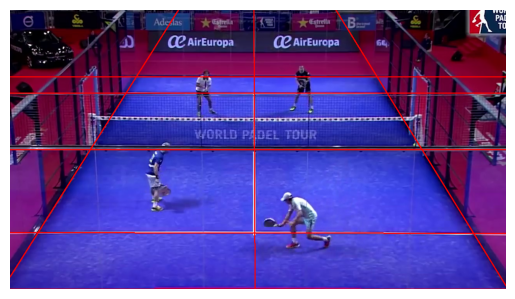

In [4]:
import cv2
import matplotlib.pyplot as plt

# Define the endpoints of the 8 lines
# The lines were plotted over the image until they coincide with the edges that delimit the paddle court

lines = [
    ((0, 0.24), (1, 0.24)),
    ((0, 1), (1, 1)),
    ((0, 0.95556), (0.339182, 0)),
    ((0.6571429, 0), (1, 0.99)),
    ((0, 0.5), (1, 0.5)),
    ((0.492, 0), (0.494, 1)),
    ((0, 0.298), (1, 0.298)),
    ((0, 0.798), (1, 0.801))
]

# Create a copy of the image to draw the lines on
image_with_lines = image.copy()

# Convert normalized coordinates to pixel coordinates and draw the lines
color = (0, 0, 255)  # Red color (BGR format)
thickness = 2       # Line thickness

for line in lines:
    pixel_point1 = (int(line[0][0] * image.shape[1]), int(line[0][1] * image.shape[0]))
    pixel_point2 = (int(line[1][0] * image.shape[1]), int(line[1][1] * image.shape[0]))
    image_with_lines = cv2.line(image_with_lines, pixel_point1, pixel_point2, color, thickness)

# Display the image with the drawn lines
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Optional: Turn off axis labels
plt.show()


In [5]:
# Define the endpoints of the 8 lines
# The lines were plot over the image untill they coincide with the edges that delimit the paddle court
# We are changing the origin from the upper left corner to the lower left corner

line1 = ((0, 1-0.24), (1, 1-0.24))
line2 = ((0, 1-1), (1, 1-1))
line3 = ((0, 1-0.95556), (0.339182, 1-0))
line4 = ((0.6571429, 1-0), (1, 1-0.99))
line5=((0,1-0.5),(1,1-0.5))
line6=((0.492,1-0),(0.494,1-1))
line7=((0, 1-0.298), (1, 1-0.298))
line8=((0, 1-0.798), (1, 1-0.801))


In [6]:
#here we define a function to generate the lines defined by the points
def coefs(lines):
  y1=lines[0][1]
  x1=lines[0][0]
  y2=lines[1][1]
  x2=lines[1][0]
  a=(y1-y2)/(x1-x2)
  b=y1-a*x1
  return a,b

def line_points(points):
  x=np.linspace(-0.2,1,100)
  a,b=coefs(points)
  y=a*x+b
  return np.array((x,y)).transpose()


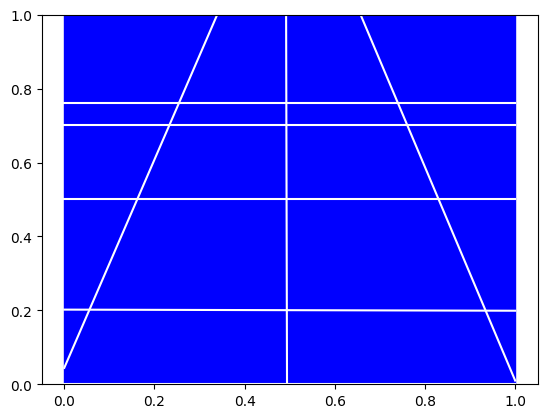

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Example line data (replace with your line data)
lines = [line1, line2, line3, line4, line5, line6, line7, line8]

# Create a blue background
plt.fill_between([0, 1], [0, 0], [1, 1], color='blue')

# Plot the lines with white color
for line in lines:
    x, y = np.array(line).T
    plt.plot(x, y, color='white')

# Set the y-axis limits
plt.ylim(0, 1)

# Display the plot
plt.show()


In [8]:
def find_intersection(line1, line2):
    x1, y1 = line1[0]
    x2, y2 = line1[1]
    x3, y3 = line2[0]
    x4, y4 = line2[1]

    denominator = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)

    if denominator == 0:
        return None  # Lines are parallel, no intersection

    # Calculate the intersection point
    px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / denominator
    py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / denominator

    return px, py

# Find the intersection points of adjacent lines
intersections = []
lines = [line1, line2, line3, line4,line5, line6, line7,line8]

for i in range(len(lines)):
    for j in range(i + 1, len(lines)):
        intersection = find_intersection(lines[i], lines[j])
        if intersection:
            intersections.append(intersection)

# Print the intersection points
print("Intersection Points:", intersections)

#the intersection points of the lines of the court are interesting to us

Intersection Points: [(0.2539924985558207, 0.76), (0.7402597727272727, 0.76), (0.49248, 0.76), (-185.99999999999986, 0.76), (-0.015774256017413883, 0.0), (1.003463203030303, -0.0), (0.494, -0.0), (67.33333333333326, -0.0), (0.5001202335225721, 1.4534030061289485), (0.16170387199129305, 0.5), (0.4911437718352103, 1.4281140823948604), (0.23340503570681062, 0.702), (0.0558674162314071, 0.20183239775130574), (0.8303030515151516, 0.5), (0.49104076002172037, 1.479619989139781), (0.7603463503030303, 0.702), (0.9344773872940098, 0.19919656783811795), (0.493, 0.5), (-99.33333333333326, 0.5), (0.492596, 0.702), (0.49359896159376954, 0.20051920311521862), (-166.66666666666652, 0.7019999999999998)]


In [9]:
#we dont need the points outside the court
(x1,y1)=intersections[4]
(x2,y2)=intersections[5]
(x3,y3)=intersections[0]
(x4,y4)=intersections[1]
(xcright, ycright)=intersections[13]
(xcc, ycc)=intersections[17]
(xcleft, ycleft)=intersections[9]
(xcup, ycup)=intersections[2]

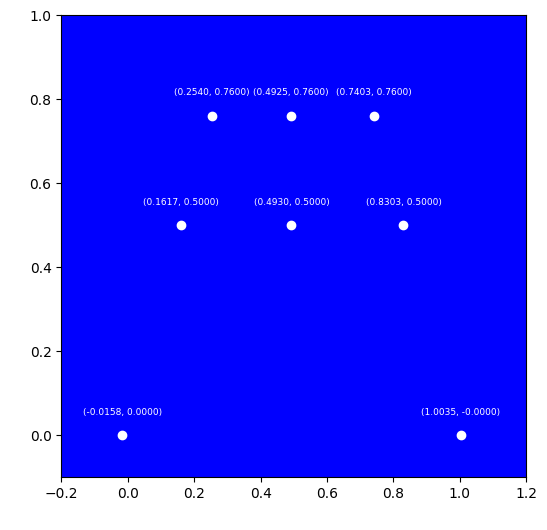

In [10]:
import matplotlib.pyplot as plt

# Set the background color to blue
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_facecolor('blue')

# Define the points and their coordinates
points = [
    (x1, y1, "Point 1"),
    (x2, y2, "Point 2"),
    (x3, y3, "Point 3"),
    (x4, y4, "Point 4"),
    (xcc, ycc, "Center Point"),
    (xcleft, ycleft, "Left Point"),
    (xcright, ycright, "Right Point"),
    (xcup, ycup, "Up Point")
]

# Create a scatter plot for each point with white color
for x, y, label in points:
    plt.scatter(x, y, label=label, color='white')

# Add text labels for each point with white color
for x, y, label in points:
    plt.text(x, y + 0.05, f"({x:.4f}, {y:.4f})", fontsize=6.5, ha='center', color='white')

# Set labels for x and y axes (customize as needed)
plt.xlabel("X Coordinate", color='white')
plt.ylabel("Y Coordinate", color='white')

# Set the axis limits and background color
plt.ylim(-0.1, 1)
plt.xlim(-0.2, 1.2)
plt.gca().set_facecolor('blue')

# Show the plot

plt.show()


In [11]:
cd /content/gdrive/MyDrive/TheCodingBug/yolov7/

/content/gdrive/MyDrive/TheCodingBug/yolov7


In [14]:
#here we run yolo in the terminal, using the detect.py script, the command --save txt gives
#the information about the classes identified and there bounding boxes
!python detect.py --save-txt --weights yolov7.pt --conf 0.5 --source data/frame_0050.jpg

Namespace(weights=['yolov7.pt'], source='data/frame_0050.jpg', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-126-g84932d7 torch 2.0.1+cu118 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
4 persons, 1 car, Done. (986.8ms) Inference, (0.9ms) NMS
 The image with the res

In [15]:
cd /content/gdrive/MyDrive/TheCodingBug/yolov7/runs/detect/exp182

/content/gdrive/MyDrive/TheCodingBug/yolov7/runs/detect/exp182


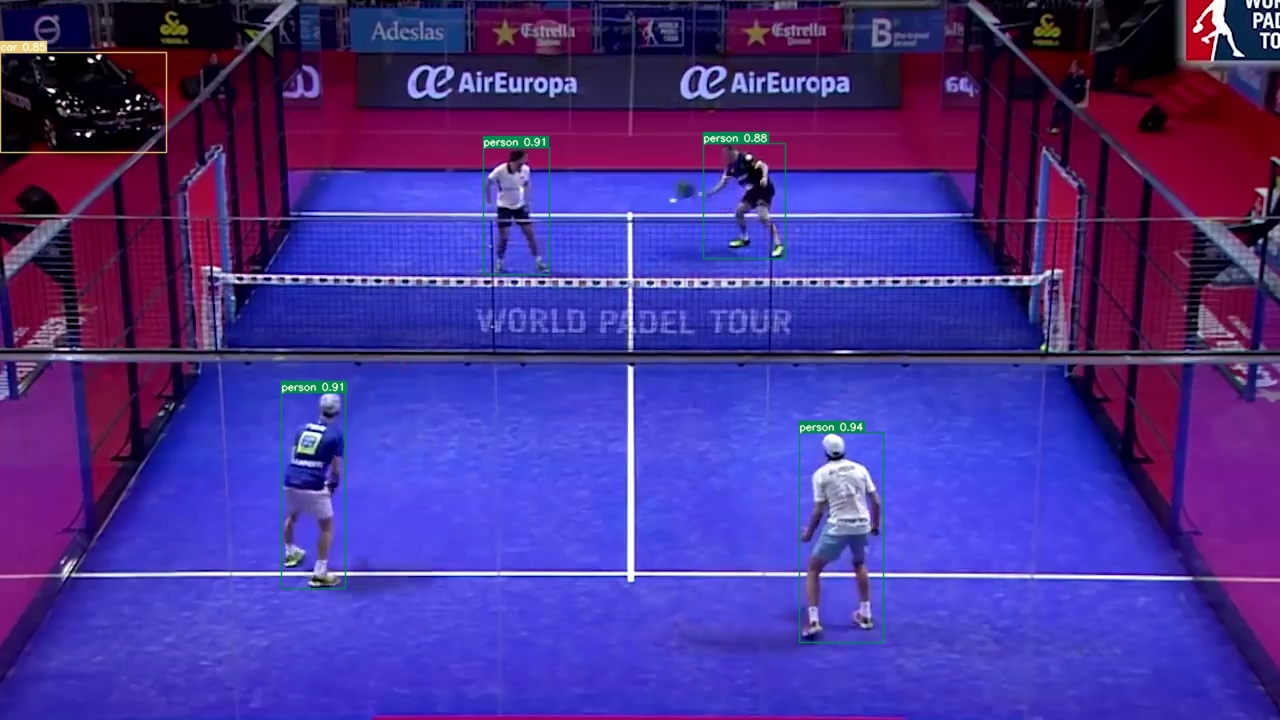

In [17]:
from PIL import Image
import IPython.display as display

# Open the JPG file
image = Image.open("frame_0050.jpg")

# Display the image in the Jupyter Notebook
display.display(image)


In [18]:
import cv2
import numpy as np

# Collect image points (points of intersection in the image)
image_points = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4],[xcc, ycc], [xcleft, ycleft],[xcright, ycright],[xcup,ycup]], dtype=np.float32)

# Define real-world coordinates based on known dimensions
court_width = 10.0  # Replace with the actual width of the court in your units
court_length = 20.0  # Replace with the actual length of the court in your units

# Assuming the top-left corner of the court is the origin (0, 0) in the real-world coordinates
real_world_points = np.array([[0, 0], [court_width, 0], [0, court_length], [court_length, court_length], [5,10],[0,10],[10,10],[5,20]], dtype=np.float32)

# Calculate the homography matrix
homography_matrix, _ = cv2.findHomography(image_points, real_world_points, cv2.RANSAC, 5.0)

In [23]:
cd /content/gdrive/MyDrive/TheCodingBug/yolov7/runs/detect/exp182

/content/gdrive/MyDrive/TheCodingBug/yolov7/runs/detect/exp182


In [24]:
cd /content/gdrive/MyDrive/TheCodingBug/yolov7/runs/detect/exp182/labels

/content/gdrive/MyDrive/TheCodingBug/yolov7/runs/detect/exp182/labels


In [25]:
# Specify the path to your text file
file_path = "frame_0050.txt"  # Replace with the actual file path

# Initialize an empty list to store the filtered lines
filtered_lines = []

# Open the text file for reading
with open(file_path, "r") as file:
    # Read and process each line
    for line in file:
        # Check if the line starts with '0'
        if line.startswith('0'):
            # If it starts with '0', add it to the filtered lines
            filtered_lines.append(line)

# Print the filtered lines
for line in filtered_lines:
    print(line, end='')  # Use 'end='' to prevent additional newline characters


0 0.58125 0.278472 0.0640625 0.159722
0 0.244531 0.680556 0.05 0.272222
0 0.403125 0.292361 0.0515625 0.176389
0 0.657031 0.745833 0.065625 0.291667


In [26]:

import numpy as np
import cv2

def real_points(i):
  x= float(filtered_lines[i].split(" ")[1])
  y= 1-((float(filtered_lines[i].split(" ")[2]) + float(filtered_lines[i].split(" ")[4])/2))
  player_position_image = np.array((x, y), dtype=np.float32)

  player_position_image = np.array([[x, y]], dtype=np.float32)

  return player_position_image

def transform_point_with_homography(H, point):
    """
    Transforms a point using a homography matrix.

    Args:
        H (numpy.ndarray): The 3x3 homography matrix.
        point (tuple): The normalized point coordinates (x, y) ranging from 0 to 1.

    Returns:
        tuple: The transformed point coordinates (x, y).
    """
    # Convert the point to homogeneous coordinates
    point_homogeneous = np.array([point[0], point[1], 1.0]).reshape(3, 1)

    # Apply the homography transformation
    transformed_point = np.dot(H, point_homogeneous)

    # Normalize the coordinates
    transformed_point /= transformed_point[2]

    return (transformed_point[0, 0], transformed_point[1, 0])

# Example usage:
# Define the homography matrix (replace with your actual matrix)
H = homography_matrix

# Define the normalized point coordinates (e.g., (0.5, 0.5))
normalized_point_1 = real_points(0)[0]
normalized_point_2 = real_points(1)[0]
normalized_point_3 = real_points(2)[0]
normalized_point_4 = real_points(3)[0]

# Transform the point
transformed_point_1 = transform_point_with_homography(H, normalized_point_1)
transformed_point_2 = transform_point_with_homography(H, normalized_point_2)
transformed_point_3 = transform_point_with_homography(H, normalized_point_3)
transformed_point_4 = transform_point_with_homography(H, normalized_point_4)

# Print the transformed point
print(real_points(0),"Transformed Point:", transformed_point_1)
print(real_points(1),"Transformed Point:", transformed_point_2)
print(real_points(2),"Transformed Point:", transformed_point_3)
print(real_points(3),"Transformed Point:", transformed_point_4)


[[0.58125  0.641667]] Transformed Point: (6.432188818800166, 14.724118611491223)
[[0.244531 0.183333]] Transformed Point: (2.1659320301489617, 2.8238186992965737)
[[0.403125  0.6194445]] Transformed Point: (3.4188285344369804, 13.87507584178767)
[[0.657031  0.1083335]] Transformed Point: (6.774458322691279, 1.6129405300435933)


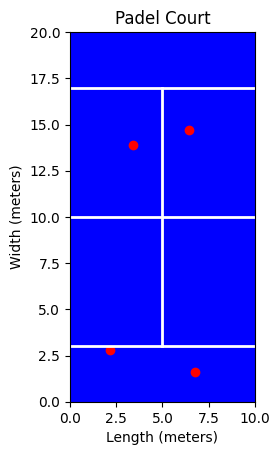

In [27]:
import matplotlib.pyplot as plt

# Define the dimensions of the paddle court
court_length = 10.0  # meters
court_width = 20.0   # meters
net_height = 0.88    # meters (height of the net)

# Create a figure and axis
fig, ax = plt.subplots()

# Set the aspect ratio to be equal
ax.set_aspect('equal', adjustable='box')

# Draw the blue background
background = plt.Rectangle((0, 0), court_length, court_width, linewidth=0, edgecolor='none', facecolor='blue')
ax.add_patch(background)

# Draw the net as a white line
net_y = court_width / 2
plt.plot([0, court_length], [net_y, net_y], color='white', linewidth=2)

# Draw the horizontal lines at 3 and 17 meters in white
plt.axhline(y=3, color='white', linewidth=2)
plt.axhline(y=17, color='white', linewidth=2)

# Draw the vertical line in the center between 3 and 17 meters in white
plt.axvline(x=court_length / 2, ymin=3 / court_width, ymax=17 / court_width, color='white', linewidth=2)
# Plot the scatter points in red

point_x, point_y=transformed_point_1
plt.scatter(point_x, point_y, color='red', marker='o')

point_x, point_y=transformed_point_2
plt.scatter(point_x, point_y, color='red', marker='o')

point_x, point_y=transformed_point_3
plt.scatter(point_x, point_y, color='red', marker='o')

point_x, point_y=transformed_point_4
plt.scatter(point_x, point_y, color='red', marker='o')


# Set axis limits
ax.set_xlim(0, court_length)
ax.set_ylim(0, court_width)

# Set axis labels
plt.xlabel('Length (meters)')
plt.ylabel('Width (meters)')

# Set plot title
plt.title('Padel Court')

# Hide grid
ax.grid(False)

# Show the plot
plt.show()
